<a href="https://colab.research.google.com/github/timsetsfire/wandb-examples/blob/main/colab/Error_Band_custom_charts_with_wandb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%%capture
!pip install wandb

## adding a custom chart to w&b

Starting out with a line plot,  we will use W&B custom charting capabilities to plot lines with error bands.  

The whole thing starts off witha vega spec

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": { "name": "wandb"},
  "layer": [
    {
      "mark": "errorband",
      "encoding": {
        "y": {
          "field": "${field:lower}",
          "type": "quantitative",
          "scale": {"zero": false},
          "title": "${string:title}"
        },
        "y2": {"field": "${field:upper}"},
        "x": {
          "field": "${field:index}"
        },
        "color": {
          "type": "nominal",
          "field": "name",
          "scale" : {
            "range" : {"field": "color"}
            }
        }
      }
    },
    {
      "mark": "line",
      "encoding": {
        "y": {
          "field": "${field:center}",
          "type": "quantitative"
        },
        "x": {
          "field": "${field:index}"
        },
        "color": {
          "type": "nominal",
          "field": "name",
          "scale" : {
            "range" : {"field": "color"}
            }
        }
      }
    }
  ]
}
```
The "fields" of this vega spec are
* `upper` - the upper value for the error band
* `lower` - the lower value for the error band
* `center` - Column containing the mean value
* `index` - the value to put on the x-axis
* `title` - the title for the y-axis

All of these fields will be passed through via chart creation a little later (see example below)

Go into W&B (any project really) and click __Add Panel__, then __Custom Chart__
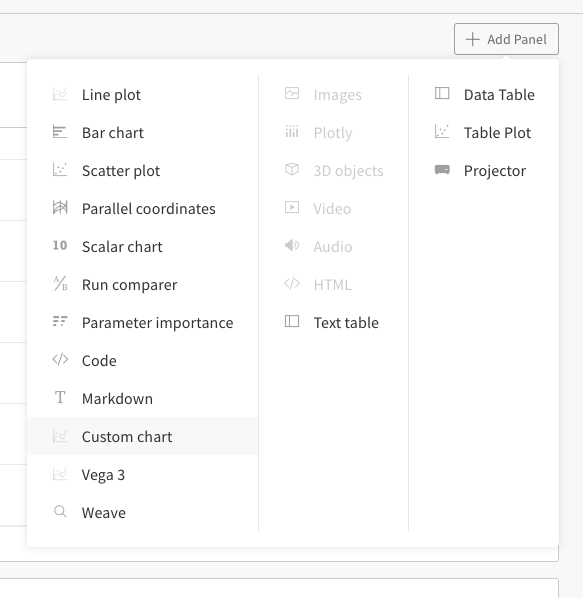

Once you have click custom chart, click the __Edit__ button
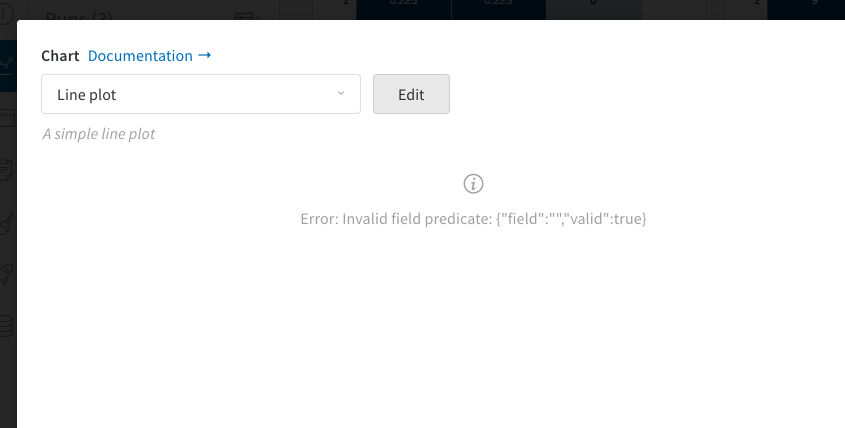

Paste in the vega spec from above and __Save as new preset__
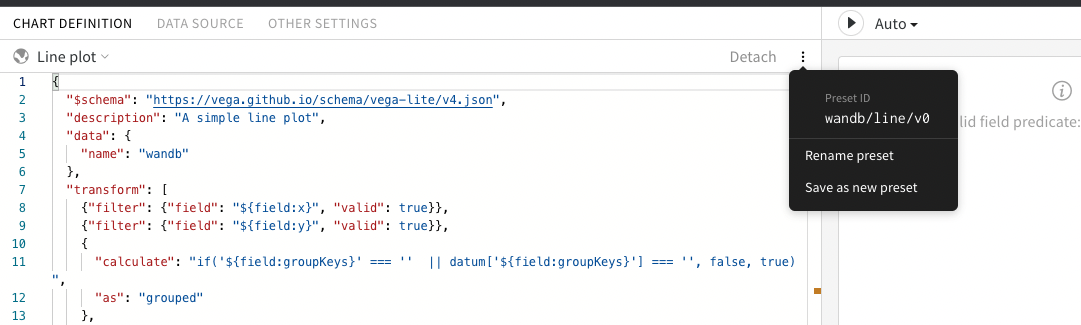

Enter a name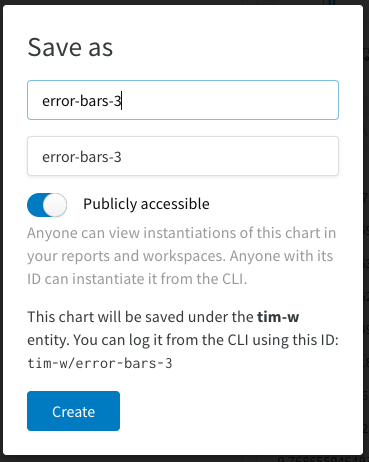
and save

Once that is complete, now you can create the plot from your code.  Please see the example below.

In [22]:
import wandb
import numpy as np
import pandas as pd

## generate data
## in shanes case, it would be a matter of appending the data to a dataframe
## or a table within each step.
n = 50
# x = np.random.randn(n)
# std = np.random.rand(n)/2
# x_upper = x + std
# x_lower = x - std
# step = np.arange(n)
# df = pd.DataFrame(dict(x = x, x_upper = x_upper, x_lower = x_lower, step = step))

import wandb
with wandb.init(entity = "tim-w", project = "test-table4") as run:
  table = wandb.Table(columns = ["x", "x_upper", "x_lower", "step"])
  for i in range(n):
    x = np.random.randn()
    std = np.random.rand() / 2
    table.add_data(x, x+std, x-std, i)

  fields = dict(upper = "x_upper", lower = "x_lower", center = "x", index = "step",)
  str_fields = dict(title = "x with errors bars")
  my_custom_chart = wandb.plot_table(vega_spec_name="tim-w/error-bands-3",
              # data_table=wandb.Table(dataframe = df),
              data_table = table,
              fields=fields, string_fields = str_fields)
  wandb.log({"error-plot": my_custom_chart})


The code above yields the following image in app

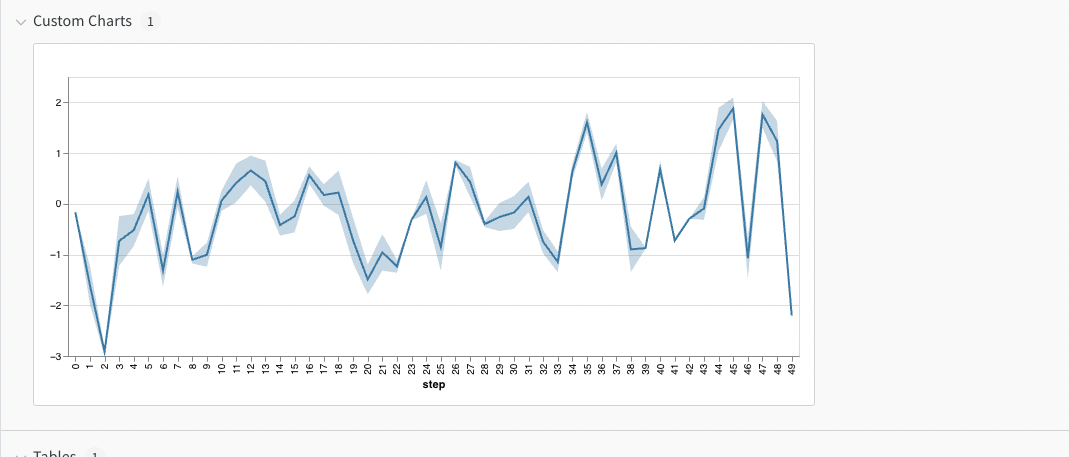